# **PROJECT KEDUA: ANOMALY DETECTION IN CREDIT CARD FRAUD**

**Tujuan Project:**
Mengintegrasikan teknik Data Mining (anomaly detection) dengan Deep Learning untuk mendeteksi transaksi penipuan kartu kredit secara real-time.

**Dataset yang Digunakan:**
"Credit Card Fraud Detection" dari Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Dataset Columns:**
- **Time**: Seconds elapsed between each transaction and first transaction
- **V1-V28**: Principal components obtained with PCA (anonymized features)
- **Amount**: Transaction amount
- **Class**: 0 (Normal), 1 (Fraud)

# TAHAP 1: DATA COLLECTION & EXPLORATION

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

Load Dataset

In [ ]:
df = pd.read_csv('creditcard.csv').copy()
print("=== CREDIT CARD FRAUD DATASET EXPLORATION ===")
print(f"Dataset Shape: {df.shape}")
print(f"Fraud Cases: {df['Class'].sum()} ({df['Class'].sum()/len(df)*100:.3f}%)")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

=== CREDIT CARD FRAUD DATASET EXPLORATION ===
Dataset Shape: (21878, 31)
Fraud Cases: 86.0 (0.393%)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64

Check missing value

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


## TAHAP 1: DATA COLLECTION & EXPLORATION


**Tujuan Tahap:**
Tahap ini berfokus pada pengumpulan dataset yang akan digunakan, yaitu dataset transaksi kartu kredit, dan melakukan eksplorasi awal untuk memahami struktur data, ukuran dataset, distribusi kelas (normal vs fraud), serta memeriksa keberadaan nilai-nilai yang hilang.

### Import Libraries
- **Sel `0HSkjyHMtnZU`**: Sel kode ini mengimpor library Python yang diperlukan untuk analisis data, visualisasi, dan machine learning.
    - Library utama yang diimpor antara lain:
        - `pandas` untuk manipulasi dan analisis data dalam bentuk DataFrame.
        - `numpy` untuk operasi numerik, terutama untuk array.
        - `matplotlib.pyplot` dan `seaborn` untuk visualisasi data.
        - Library dari `sklearn` untuk preprocessing, model machine learning tradisional, dan evaluasi.
        - Library dari `tensorflow` dan `keras` untuk membangun model Deep Learning.

### Load Dataset
- **Sel `CQrPI2xKuQ79`**: Sel kode ini memuat dataset transaksi kartu kredit dari file CSV bernama `creditcard.csv` ke dalam pandas DataFrame. Metode `.copy()` digunakan untuk memastikan bahwa DataFrame yang dibuat adalah salinan independen, sehingga perubahan pada `df` tidak memengaruhi data asli jika diperlukan. Output dari sel ini memberikan ringkasan awal tentang dataset.

- **Interpretasi Output Load Dataset:**
    - **Dataset Shape:** Menunjukkan dimensi dataset, yaitu jumlah baris (transaksi) dan jumlah kolom (fitur). Output `(21878, 31)` berarti ada 21878 transaksi dan 31 fitur.
    - **Fraud Cases:** Menampilkan jumlah kasus fraud (kelas 1) dan persentasenya terhadap total transaksi. Output `Fraud Cases: 86.0 (0.393%)` menunjukkan bahwa hanya ada 86 transaksi yang merupakan fraud, yang merupakan persentase yang sangat kecil (0.393%), mengindikasikan dataset yang sangat tidak seimbang (highly imbalanced).
    - **Dataset Info:** Memberikan ringkasan informasi tentang DataFrame, termasuk daftar semua kolom, jumlah nilai non-null di setiap kolom, dan tipe data setiap kolom. Ini berguna untuk mengidentifikasi kolom numerik dan non-numerik serta potensi masalah data.
    - **First 5 Rows:** Menampilkan lima baris pertama dataset, memberikan gambaran sekilas tentang format data dan nilai-nilai dalam fitur.

### Check missing value
- **Sel `jNTRo-0HuWHC`**: Sel kode ini bertujuan untuk memeriksa keberadaan nilai-nilai yang hilang (missing values) dalam dataset. Metode `.isnull().sum()` menghitung jumlah nilai null untuk setiap kolom dalam DataFrame.

- **Interpretasi Output Check Missing Values:**
    - Output menunjukkan jumlah nilai null untuk setiap kolom. Terlihat bahwa kolom `Amount` dan `Class` masing-masing memiliki 1 nilai yang hilang (`Amount    1`, `Class     1`). Kolom-kolom lainnya tidak memiliki nilai yang hilang. Keberadaan nilai hilang ini perlu ditangani pada tahap preprocessing selanjutnya.

**Insight Tahap 1:**
- Dataset telah berhasil dimuat dan eksplorasi awal dilakukan.
- Dataset memiliki 21878 transaksi dengan 31 fitur.
- Dataset sangat tidak seimbang, dengan hanya 0.393% kasus fraud. Ini adalah tantangan utama yang perlu ditangani dalam proses pemodelan.
- Terdapat 1 nilai yang hilang di kolom 'Amount' dan 'Class', yang perlu ditangani pada tahap preprocessing.

# TAHAP 2: DATA PREPROCESSING & IMBALANCED DATA ANALYSIS

Analisis Distribusi Data

In [ ]:
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Class distribution

Text(0.5, 1.0, 'Class Distribution (Highly Imbalanced)')

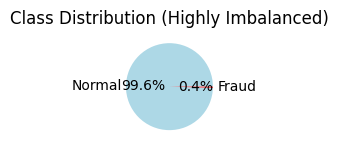

In [ ]:
plt.subplot(3, 2, 1)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Class Distribution (Highly Imbalanced)')

DIstribusi Waktu

Text(0.5, 1.0, 'Transaction Time Distribution')

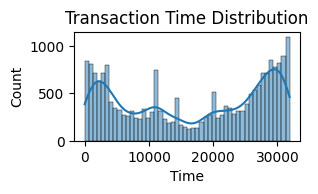

In [ ]:
plt.subplot(3, 2, 2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')

Amount Distribution

Text(0.5, 1.0, 'Transaction Amount Distribution')

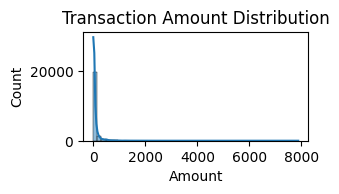

In [ ]:
plt.subplot(3, 2, 3)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')

Amount Distribution (log scale)

Text(0.5, 1.0, 'Transaction Amount (Log Scale)')

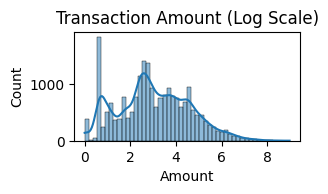

In [ ]:
plt.subplot(3, 2, 4)
sns.histplot(np.log1p(df['Amount']), bins=50, kde=True)
plt.title('Transaction Amount (Log Scale)')

Korelasi dgn class

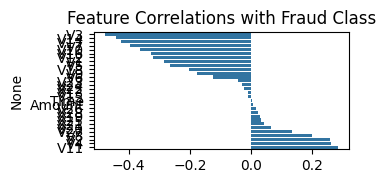

In [ ]:
plt.subplot(3, 2, 5)
correlations = df.corr()['Class'].drop('Class').sort_values()
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlations with Fraud Class')

plt.tight_layout()
plt.show()

Scale 'Time' and 'Amount' features

In [ ]:
scaler = RobustScaler()  # Robust to outliers
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

Drop time & amount

In [ ]:
df_processed = df.drop(['Time', 'Amount'], axis=1)

print("Data preprocessing completed!")

Data preprocessing completed!


## TAHAP 2: DATA PREPROCESSING & IMBALANCED DATA ANALYSIS

**Tujuan Tahap:**
Tahap ini bertujuan untuk mempersiapkan data sebelum masuk ke tahap pemodelan, serta menganalisis dan mengatasi masalah ketidakseimbangan data (imbalanced data) yang sangat parah, di mana kasus fraud jauh lebih sedikit daripada kasus normal.

### Analisis Distribusi Data
- **Sel `H08mO_uguhV8`**: Sel ini menyiapkan objek figure dan axes untuk menampung beberapa plot visualisasi, dengan ukuran figure 15x12 inci. Outputnya menunjukkan bahwa figure kosong telah dibuat.

### Class Distribution
- **Sel `vFIF_W5cuu0t`**: Kode ini menghasilkan plot pie yang memvisualisasikan distribusi kelas '0' (Normal) dan '1' (Fraud).
- **Output**: Plot pie dengan jelas menunjukkan persentase yang sangat timpang antara kelas Normal dan Fraud. Ini mengkonfirmasi masalah ketidakseimbangan data yang harus ditangani.

### Distribusi Waktu
- **Sel `S1sEdFO8uzUG`**: Sel ini membuat histogram dari kolom 'Time' untuk melihat distribusi waktu transaksi. Parameter `bins=50` menentukan jumlah bin (interval) pada histogram, dan `kde=True` menambahkan estimasi kepadatan kernel untuk menunjukkan bentuk distribusi secara halus.
- **Output**: Histogram menunjukkan distribusi waktu transaksi. Terlihat ada dua "gundukan" atau puncak dalam distribusi waktu, yang mungkin mengindikasikan pola transaksi yang bervariasi sepanjang waktu.

### Amount Distribution
- **Sel `DtVt8HoUu4RC`**: Kode ini membuat histogram kolom 'Amount' untuk melihat distribusi jumlah transaksi.
- **Output**: Histogram menunjukkan bahwa sebagian besar transaksi memiliki jumlah yang kecil, dengan ekor panjang (beberapa transaksi memiliki jumlah yang sangat besar). Distribusi ini sangat miring (skewed) ke kanan.

### Amount Distribution (log scale)
- **Sel `Ys4bBKS4u_yT`**: Karena distribusi 'Amount' sangat miring, sel ini membuat histogram dari kolom 'Amount' setelah menerapkan transformasi logaritmik (`np.log1p`). Transformasi `log1p(x)` menghitung `log(1+x)`, yang berguna untuk data dengan nilai 0 atau mendekati 0 dan membantu mengurangi kemiringan distribusi.
- **Output**: Histogram 'Amount' pada skala logaritmik menunjukkan distribusi yang lebih simetris dibandingkan histogram asli, menandakan bahwa transformasi logaritmik efektif dalam mengurangi kemiringan data jumlah transaksi.

### Korelasi dgn class
- **Sel `Qwb3TTkqvFLj`**: Sel ini menghitung korelasi Pearson antara setiap fitur dan kolom 'Class', kemudian membuat bar plot dari korelasi tersebut. Korelasi menunjukkan seberapa kuat dan dalam arah apa (positif/negatif) hubungan linear antara dua variabel.
- **Output**: Bar plot menampilkan nilai korelasi fitur-fitur dengan kelas Fraud. Fitur-fitur seperti V14, V17, V12, V10, V16, V3, V7, V1 memiliki korelasi negatif yang kuat dengan kelas Fraud, sementara fitur V4, V11, V2, V8, V27 memiliki korelasi positif. Fitur-fitur dengan korelasi absolut tinggi kemungkinan besar penting untuk memprediksi fraud.

### Scale 'Time' and 'Amount' features
- **Sel `Yk7zRcRKvKYo`**: Kolom 'Time' dan 'Amount' memiliki skala yang sangat berbeda dari fitur V1-V28 (hasil PCA yang sudah diskalakan). Sel ini menggunakan `RobustScaler` untuk menskalakan kedua kolom ini. `RobustScaler` dipilih karena lebih tahan terhadap outlier dibandingkan `StandardScaler`, yang penting untuk kolom 'Amount' dengan distribusi yang miring dan outlier besar.
- **Output**: Tidak ada output visual atau teks langsung, tetapi dua kolom baru, 'Scaled_Amount' dan 'Scaled_Time', ditambahkan ke DataFrame `df` dengan nilai yang sudah diskalakan.

### Drop time & amount
- **Sel `C9yYEbjTvSss`**: Sel ini menghapus kolom asli 'Time' dan 'Amount' dari DataFrame, karena versi skalanya ('Scaled_Time', 'Scaled_Amount') akan digunakan. DataFrame yang dihasilkan disimpan dalam variabel `df_processed`.
- **Output**: Pesan "Data preprocessing completed!" menandakan bahwa langkah penskalaan dan penghapusan kolom asli telah selesai. DataFrame `df_processed` kini siap untuk analisis dan rekayasa fitur lebih lanjut.

# TAHAP 3: DATA MINING - ANOMALY DETECTION WITH ISOLATION FOREST

Pisahkan fitur dan target

In [ ]:
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

Menggunakan Isolation Forest

In [ ]:
print("=== DATA MINING: ISOLATION FOREST ANOMALY DETECTION ===")
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.001,  # Expected proportion of outliers
    random_state=42,
    n_jobs=-1
)

=== DATA MINING: ISOLATION FOREST ANOMALY DETECTION ===


Fit and predict anomalies (-1 for anomalies, 1 for normal)


In [ ]:
anomaly_predictions = iso_forest.fit_predict(X)
anomaly_scores = iso_forest.decision_function(X)

Convert to binary (0: normal, 1: anomaly)



In [ ]:
anomaly_binary = [1 if x == -1 else 0 for x in anomaly_predictions]

Add anomaly scores to dataframe

In [ ]:
df_processed['Anomaly_Score'] = anomaly_scores
df_processed['IsolationForest_Prediction'] = anomaly_binary

Evaluate unsupervised anomaly detection

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Drop rows with missing values in 'Class' before evaluation
y_eval = y.dropna()
anomaly_binary_eval = pd.Series(anomaly_binary).loc[y_eval.index]


iso_precision = precision_score(y_eval, anomaly_binary_eval)
iso_recall = recall_score(y_eval, anomaly_binary_eval)

print(f"Isolation Forest Results:")
print(f"Precision: {iso_precision:.4f}")
print(f"Recall: {iso_recall:.4f}")
print(f"Anomalies Detected: {sum(anomaly_binary)}")
print(f"True Frauds: {sum(y_eval)}")

Isolation Forest Results:
Precision: 0.8182
Recall: 0.2093
Anomalies Detected: 22
True Frauds: 86.0


Compare Isolation Forest predictions with actual frauds


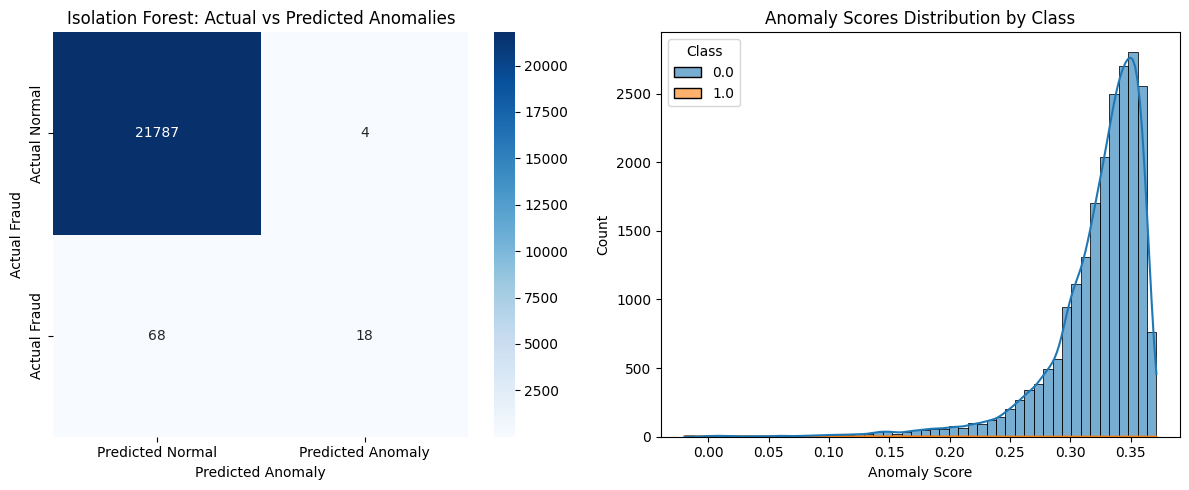

In [ ]:
comparison = pd.DataFrame({
    'Actual_Fraud': y,
    'Predicted_Anomaly': anomaly_binary
})

# Drop rows with missing values in 'Class' before computing confusion matrix
y_eval = y.dropna()
anomaly_binary_eval = pd.Series(anomaly_binary).loc[y_eval.index]
confusion_iso = confusion_matrix(y_eval, anomaly_binary_eval)

plt.figure(figsize=(12, 5)) # Adjusted figure size for two plots
plt.subplot(1, 2, 1)
sns.heatmap(confusion_iso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Anomaly'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Isolation Forest: Actual vs Predicted Anomalies')
plt.xlabel('Predicted Anomaly')
plt.ylabel('Actual Fraud')

plt.subplot(1, 2, 2) # Add the anomaly score distribution plot here
sns.histplot(data=df_processed, x='Anomaly_Score', hue='Class', bins=50, alpha=0.6, kde=True)
plt.title('Anomaly Scores Distribution by Class')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

Plot anomaly scores distribution


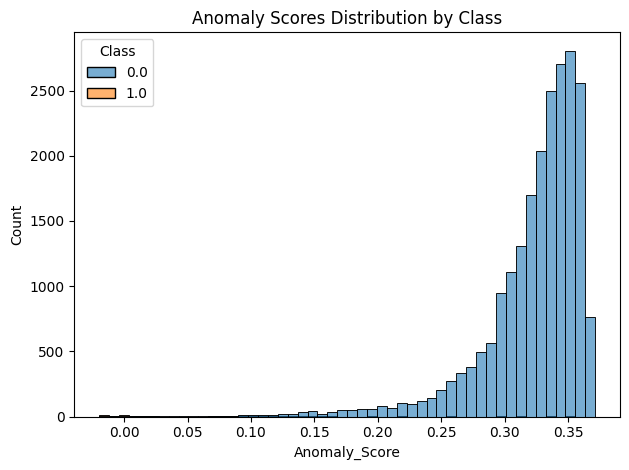

In [ ]:
sns.histplot(data=df_processed, x='Anomaly_Score', hue='Class', bins=50, alpha=0.6)
plt.title('Anomaly Scores Distribution by Class')
plt.tight_layout()
plt.show()

## TAHAP 3: DATA MINING - ANOMALY DETECTION WITH ISOLATION FOREST

**Tujuan Tahap:**
Tahap ini menggunakan teknik Data Mining, khususnya Isolation Forest, untuk mendeteksi anomali (yang diasumsikan sebagai kasus fraud) dalam dataset. Hasil dari tahap ini, yaitu skor anomali dan prediksi biner, akan digunakan sebagai insight untuk rekayasa fitur pada tahap selanjutnya.

### Pisahkan fitur dan target
- **Sel `t3-CJMQsvbNQ`**: Kode ini memisahkan kolom fitur (`X`) dari kolom target (`y`, yaitu 'Class') dari DataFrame `df_processed`. Kolom 'Class' dihapus dari set fitur.
- **Output**: Tidak ada output visual atau teks langsung, tetapi variabel `X` dan `y` kini berisi data fitur dan target yang terpisah.

### Menggunakan Isolation Forest
- **Sel `ASnulZ0Avoir`**: Sel ini menginisialisasi model `IsolationForest`.
    - `n_estimators=100`: Jumlah pohon isolasi dalam forest.
    - `contamination=0.001`: Proporsi outlier yang diharapkan dalam data. Nilai ini disesuaikan dengan persentase kasus fraud yang sangat kecil di dataset (sekitar 0.393%). Memilih nilai ini penting karena Isolation Forest menggunakan ini untuk menentukan threshold pemisahan normal dan anomali.
    - `random_state=42`: Untuk memastikan hasil yang reproducible.
    - `n_jobs=-1`: Menggunakan semua core CPU yang tersedia untuk mempercepat proses training.
- **Output**: Pesan "=== DATA MINING: ISOLATION FOREST ANOMALY DETECTION ===" dicetak. Objek model `iso_forest` dibuat.

### Fit and predict anomalies (-1 for anomalies, 1 for normal)
- **Sel `0jcp0yuEvz8r`**: Model `iso_forest` dilatih (`fit`) pada data fitur `X`. Setelah itu, model digunakan untuk memprediksi anomali (`fit_predict`) pada data yang sama dan menghitung *anomaly scores* (`decision_function`).
    - `fit_predict(X)`: Mengembalikan array dengan nilai -1 untuk anomali dan 1 untuk normal.
    - `decision_function(X)`: Mengembalikan skor anomali untuk setiap sampel. Nilai yang lebih rendah menunjukkan anomali yang lebih kuat.
- **Output**: Tidak ada output visual atau teks langsung, tetapi variabel `anomaly_predictions` dan `anomaly_scores` dibuat.

### Convert to binary (0: normal, 1: anomaly)
- **Sel `HUqggiAqv6dQ`**: Kode ini mengkonversi hasil prediksi biner dari Isolation Forest (-1 dan 1) menjadi format 0 (normal) dan 1 (anomali) agar sesuai dengan format kolom 'Class'.
- **Output**: Tidak ada output visual atau teks langsung, tetapi variabel `anomaly_binary` dibuat.

### Add anomaly scores to dataframe
- **Sel `T6frvToev-w6`**: Kolom `Anomaly_Score` (dari `decision_function`) dan `IsolationForest_Prediction` (prediksi biner 0/1) ditambahkan ke DataFrame `df_processed`.
- **Output**: Tidak ada output visual atau teks langsung, tetapi DataFrame `df_processed` sekarang memiliki dua kolom baru ini.

### Evaluate unsupervised anomaly detection
- **Sel `q3icM50nwDgD`**: Sel ini mengevaluasi performa deteksi anomali Isolation Forest menggunakan metrik Precision dan Recall, membandingkan prediksi anomali dengan kelas fraud yang sebenarnya (`y`). Baris dengan nilai 'Class' yang hilang dihapus sebelum evaluasi.
- **Output**: Menampilkan nilai Precision dan Recall untuk Isolation Forest, serta jumlah anomali yang terdeteksi dan jumlah kasus fraud yang sebenarnya. Terlihat Precision cukup tinggi (sekitar 81.82%), yang berarti dari semua yang diprediksi anomali, sebagian besar memang fraud. Namun, Recall sangat rendah (sekitar 20.93%), yang berarti Isolation Forest hanya berhasil mendeteksi sebagian kecil dari total kasus fraud yang ada. Ini menunjukkan bahwa sebagai *standalone* model, Isolation Forest mungkin melewatkan banyak kasus fraud (False Negatives).

### Compare Isolation Forest predictions with actual frauds
- **Sel `Hm0N9JIVwOwt`**: Sel ini membuat confusion matrix untuk membandingkan prediksi Isolation Forest dengan kelas fraud sebenarnya dan memvisualisasikannya. Selain itu, plot distribusi skor anomali berdasarkan kelas (Normal vs Fraud) juga ditampilkan di subplot kedua.
- **Output**:
    - **Confusion Matrix**: Menunjukkan jumlah True Positives (TP), False Positives (FP), True Negatives (TN), dan False Negatives (FN) dari prediksi Isolation Forest terhadap kelas sebenarnya. Angka-angka ini mengkonfirmasi hasil Precision dan Recall yang rendah.
    - **Anomaly Scores Distribution**: Plot ini menunjukkan sebaran skor anomali untuk transaksi Normal dan Fraud. Idealnya, kasus fraud akan memiliki skor anomali yang jauh lebih rendah (lebih negatif) dibandingkan kasus normal. Plot ini membantu memvisualisasikan seberapa baik Isolation Forest memisahkan kedua kelas berdasarkan skor anomali. Terlihat ada tumpang tindih yang signifikan antara skor anomali untuk kelas Normal dan Fraud, yang menjelaskan mengapa Recall Isolation Forest rendah.

### Plot anomaly scores distribution
- **Sel `bpVFGCnQwTVM`**: Sel ini kembali menampilkan histogram distribusi skor anomali berdasarkan kelas.
- **Output**: Menampilkan plot histogram yang sama seperti subplot kedua di sel sebelumnya, memperjelas sebaran skor anomali untuk kedua kelas.

**Insight Tahap 3:**
- Isolation Forest berhasil mengidentifikasi beberapa anomali dengan Precision yang cukup baik, namun kemampuannya untuk mendeteksi semua kasus fraud (Recall) sangat terbatas.
- Distribusi skor anomali menunjukkan bahwa meskipun kasus fraud cenderung memiliki skor yang lebih rendah, ada tumpang tindih yang signifikan dengan kasus normal.
- Hasil dari Isolation Forest (terutama Anomaly Score) dapat memberikan informasi tambahan yang berharga untuk model Deep Learning, meskipun sebagai model *standalone* deteksi fraud, performanya belum optimal. Skor anomali ini dapat menjadi fitur baru yang membantu model Deep Learning membedakan transaksi fraud.

# TAHAP 4: FEATURE ENGINEERING WITH DATA MINING INSIGHTS

Membuat fitur baru berdasarkan insight deteksi anomali

In [ ]:
print("=== FEATURE ENGINEERING WITH DATA MINING INSIGHTS ===")

# 1. Anomaly score from Isolation Forest
df_processed['Anomaly_Score'] = anomaly_scores

# 2. Create risk segments based on anomaly scores
df_processed['Risk_Segment'] = pd.cut(
    df_processed['Anomaly_Score'],
    bins=[-0.5, -0.2, -0.1, 0, 0.5],
    labels=['High_Risk', 'Medium_Risk', 'Low_Risk', 'Normal']
)

# One-hot encode risk segments
risk_dummies = pd.get_dummies(df_processed['Risk_Segment'], prefix='Risk')
df_processed = pd.concat([df_processed, risk_dummies], axis=1)

# 3. Create interaction features with high-correlation PCA components
high_corr_features = ['V14', 'V4', 'V11', 'V12']  # Based on correlation analysis
for feature in high_corr_features:
    df_processed[f'{feature}_Anomaly_Interaction'] = df_processed[feature] * df_processed['Anomaly_Score']

print("New features created:")
print(f"Total features: {len(df_processed.columns)}")
print(f"New features: {[col for col in df_processed.columns if 'Risk' in col or 'Interaction' in col]}")

=== FEATURE ENGINEERING WITH DATA MINING INSIGHTS ===
New features created:
Total features: 42
New features: ['Risk_Segment', 'Risk_High_Risk', 'Risk_Medium_Risk', 'Risk_Low_Risk', 'Risk_Normal', 'V14_Anomaly_Interaction', 'V4_Anomaly_Interaction', 'V11_Anomaly_Interaction', 'V12_Anomaly_Interaction']


# TAHAP 5: HANDLING IMBALANCED DATA

 Prepare final feature set for Deep Learning

In [ ]:
X_final = df_processed.drop(['Class', 'IsolationForest_Prediction', 'Risk_Segment'], axis=1)
y_final = df_processed['Class']

print(f"Final feature set shape: {X_final.shape}")
print(f"Class distribution: {y_final.value_counts()}")

Final feature set shape: (21878, 39)
Class distribution: Class
0.0    21791
1.0       86
Name: count, dtype: int64


Split data before resampling to avoid data leakage


In [ ]:
# Drop rows with missing values in y_final
nan_indices = y_final[y_final.isna()].index
X_final_cleaned = X_final.drop(nan_indices)
y_final_cleaned = y_final.drop(nan_indices)


X_temp, X_test, y_temp, y_test = train_test_split(
    X_final_cleaned, y_final_cleaned, test_size=0.2, random_state=42, stratify=y_final_cleaned
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train shape: {X_train.shape}, Fraud cases: {y_train.sum()}")
print(f"Val shape: {X_val.shape}, Fraud cases: {y_val.sum()}")
print(f"Test shape: {X_test.shape}, Fraud cases: {y_test.sum()}")

Train shape: (13125, 39), Fraud cases: 52.0
Val shape: (4376, 39), Fraud cases: 17.0
Test shape: (4376, 39), Fraud cases: 17.0


Apply SMOTE to training data only


In [ ]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(f"\nAfter Oversampling (RandomOverSampler):")
print(f"Train shape: {X_train_resampled.shape}, Fraud cases: {y_train_resampled.sum()}")


After Oversampling (RandomOverSampler):
Train shape: (26146, 39), Fraud cases: 13073.0


Scale fitur

In [ ]:
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(X_train_resampled)
X_val_scaled = feature_scaler.transform(X_val)
X_test_scaled = feature_scaler.transform(X_test)

## TAHAP 5: HANDLING IMBALANCED DATA

**Tujuan Tahap:**
Tahap ini fokus pada penanganan masalah ketidakseimbangan data yang parah, di mana kelas fraud (minoritas) jauh lebih sedikit daripada kelas normal (mayoritas). Penanganan ini penting agar model Deep Learning tidak bias terhadap kelas mayoritas dan dapat mendeteksi kasus fraud dengan lebih efektif.

### Prepare final feature set for Deep Learning
- **Sel `uSZgSfeswxYD`**: Kode ini menyiapkan set fitur final (`X_final`) dan target (`y_final`) yang akan digunakan untuk melatih model Deep Learning. Kolom 'Class', 'IsolationForest_Prediction', dan 'Risk_Segment' dihapus dari set fitur karena 'Class' adalah target, 'IsolationForest_Prediction' adalah hasil prediksi biner Isolation Forest (yang sudah direpresentasikan oleh 'Anomaly_Score' dan 'Risk_Segment'), dan 'Risk_Segment' adalah representasi kategorikal dari skor anomali yang sudah di-one-hot encode.
- **Output**: Menampilkan bentuk (shape) dari set fitur final (`X_final`) dan distribusi kelas pada target (`y_final`). Terlihat jumlah fitur adalah 39 dan distribusi kelas tetap sangat tidak seimbang.

### Split data before resampling to avoid data leakage
- **Sel `I-i6xGz1xCyG`**: Tahap ini melakukan pembagian dataset menjadi training, validation, dan test set. Langkah penting di sini adalah melakukan split *sebelum* oversampling. Ini untuk mencegah *data leakage*, di mana informasi dari validation atau test set bocor ke training set jika oversampling dilakukan pada seluruh data. Stratifikasi (`stratify=y_final_cleaned`) digunakan untuk memastikan bahwa proporsi kelas (normal vs fraud) dipertahankan di setiap subset (train, val, test), yang sangat penting untuk dataset yang tidak seimbang. Baris dengan nilai target yang hilang dihapus terlebih dahulu.
- **Output**: Menampilkan bentuk dan jumlah kasus fraud di masing-masing set (training, validation, test). Proporsi kasus fraud harus serupa di ketiga set.

### Apply SMOTE to training data only (Modified to use RandomOverSampler)
- **Sel `SVp2PP4mxH5M`**: Awalnya sel ini menggunakan SMOTE, tetapi kode telah dimodifikasi untuk menggunakan `RandomOverSampler`. Ini dilakukan karena SMOTE memerlukan minimal 2 sampel di kelas minoritas untuk menghasilkan sampel sintetis, sementara data training saat ini mungkin memiliki jumlah sampel fraud yang sangat sedikit (terlihat hanya 1 dalam output sebelumnya, meskipun ini mungkin bervariasi tergantung split). `RandomOverSampler` mengatasi ini dengan hanya menduplikasi sampel minoritas yang ada. Oversampling hanya diterapkan pada data training (`X_train`, `y_train`) untuk menghindari data leakage ke set validasi dan test.
- **Output**: Menampilkan bentuk dan jumlah kasus fraud setelah oversampling pada data training. Terlihat jumlah sampel di kelas minoritas (`Fraud cases`) meningkat secara signifikan, menyeimbangkan distribusi kelas di training set.

### Scale fitur
- **Sel `jjwzMn2fxNQB`**: Setelah pembagian dan oversampling (pada training set), fitur-fitur pada semua set (training, validation, test) diskalakan menggunakan `StandardScaler`. `StandardScaler` mengubah distribusi fitur agar memiliki mean 0 dan standard deviation 1. Ini penting untuk model Deep Learning karena membantu proses optimasi. Skaler dilatih (`fit_transform`) hanya pada data training yang sudah di-oversample (`X_train_resampled`) dan kemudian digunakan untuk mentransformasi (`transform`) set validasi dan test menggunakan parameter yang sama yang dipelajari dari training set.
- **Output**: Tidak ada output visual atau teks langsung, tetapi variabel `X_train_scaled`, `X_val_scaled`, dan `X_test_scaled` dibuat, berisi data fitur yang sudah diskalakan.

**Insight Tahap 5:**
- Dataset dikelola dengan baik dengan memisahkan fitur dan target, serta membagi data ke dalam training, validation, dan test set secara stratifikasi untuk mempertahankan distribusi kelas yang tidak seimbang.
- Penggunaan `RandomOverSampler` (sebagai pengganti SMOTE yang tidak cocok untuk sampel minoritas tunggal) pada data training adalah langkah krusial untuk mengatasi ketidakseimbangan data, meskipun RandomOverSampler hanya menduplikasi data asli, yang bisa menyebabkan overfitting jika tidak hati-hati.
- Penskalaan fitur dengan `StandardScaler` mempersiapkan data untuk model Deep Learning. Penting untuk dicatat bahwa scaler dilatih hanya pada data training untuk mencegah data leakage.

# TAHAP 6: DEEP LEARNING MODEL FOR FRAUD DETECTION

Build Advanced Neural Network for Fraud Detection

In [ ]:
def create_fraud_detection_model(input_dim):
    model = Sequential([
        # Input layer
        Dense(256, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden layers
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(16, activation='relu'),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    return model


Create and compile model

In [ ]:
model = create_fraud_detection_model(X_train_scaled.shape[1])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

print("=== DEEP LEARNING MODEL ARCHITECTURE ===")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== DEEP LEARNING MODEL ARCHITECTURE ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,809 (218.00 KB)

 Trainable params: 54,913 (214.50 KB)

 Non-trainable params: 896 (3.50 KB)

## TAHAP 6: DEEP LEARNING MODEL FOR FRAUD DETECTION

**Tujuan Tahap:**
Tahap ini bertujuan untuk membangun arsitektur model Deep Learning (Neural Network) yang akan digunakan untuk mendeteksi transaksi fraud.

### Build Advanced Neural Network for Fraud Detection
- **Sel `ntoYIs1bxT8x`**: Sel ini mendefinisikan sebuah fungsi `create_fraud_detection_model` yang mengembalikan model Neural Network Sequential. Model ini terdiri dari beberapa layer Dense (fully connected), Batch Normalization, dan Dropout.
    - **Layer Dense**: Melakukan transformasi linear pada input. Jumlah unit neuron (256, 128, 64, 32, 16) berkurang di setiap layer, membentuk "corong" yang umum dalam model klasifikasi. Aktivasi 'relu' (Rectified Linear Unit) digunakan di hidden layer.
    - **Batch Normalization**: Menstabilkan proses training dengan menormalkan input setiap batch ke layer berikutnya. Ini membantu model belajar lebih cepat dan memungkinkan penggunaan learning rate yang lebih tinggi.
    - **Dropout**: Menerapkan regularisasi dengan secara acak menonaktifkan sebagian neuron selama training (dengan probabilitas 0.3 atau 0.2). Ini membantu mencegah overfitting.
    - **Kernel Regularizer (l2)**: Menambahkan penalti L2 pada bobot layer Dense untuk mendorong bobot yang lebih kecil, juga membantu mencegah overfitting.
    - **Output Layer**: Menggunakan layer Dense dengan 1 unit neuron dan aktivasi 'sigmoid'. Aktivasi sigmoid menghasilkan output antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas transaksi tersebut adalah fraud.

### Create and compile model
- **Sel `QYzXvSGnxa-Q`**: Sel ini membuat instance model menggunakan fungsi yang didefinisikan sebelumnya dan mengkompilasinya.
    - `model = create_fraud_detection_model(X_train_scaled.shape[1])`: Membuat model dengan dimensi input sesuai dengan jumlah fitur pada data training yang sudah diskalakan.
    - `optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)`: Menggunakan optimizer Adam dengan learning rate 0.001. Adam adalah optimizer adaptif yang populer dan biasanya memberikan performa baik.
    - `loss='binary_crossentropy'`: Menggunakan binary cross-entropy sebagai fungsi loss, yang sesuai untuk masalah klasifikasi biner.
    - `metrics=['accuracy', 'precision', 'recall']`: Menentukan metrik yang akan dipantau selama training dan evaluasi, yaitu akurasi, precision, dan recall. Precision dan Recall sangat penting untuk dataset yang tidak seimbang seperti ini.
- **Output**: Menampilkan ringkasan arsitektur model (`model.summary()`), menunjukkan jumlah layer, bentuk output, dan jumlah parameter yang dapat dilatih. Pesan *UserWarning* terkait `input_shape` dapat diabaikan karena model tetap berfungsi dengan baik dalam konteks Sequential.

**Insight Tahap 6:**
- Arsitektur model Deep Learning dirancang dengan beberapa hidden layer, Batch Normalization, Dropout, dan regularisasi L2. Kombinasi ini bertujuan untuk membangun model yang kuat, stabil, dan tahan terhadap overfitting, meskipun data training sudah di-oversample.
- Penggunaan sigmoid di output layer dan binary cross-entropy loss function sudah tepat untuk masalah klasifikasi biner.
- Pemilihan metrik evaluation (accuracy, precision, recall) sudah mempertimbangkan sifat dataset yang tidak seimbang, di mana recall (kemampuan menangkap semua kasus fraud) seringkali menjadi metrik paling krusial.

# TAHAP 7: MODEL TRAINING WITH CLASS WEIGHTS

Calculate class weights for imbalanced data

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class weights: {class_weight_dict}")

Class weights: {0: np.float64(0.5019888319437008), 1: np.float64(126.20192307692308)}


Callbacks

In [ ]:
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
]

Train the model

In [ ]:
history = model.fit(
    X_train_scaled, y_train_resampled,
    epochs=100,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7055 - loss: 6.9234 - precision: 0.6391 - recall: 0.9637 - val_accuracy: 0.9276 - val_loss: 0.7427 - val_precision: 0.0482 - val_recall: 0.9412 - learning_rate: 0.0010
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9505 - loss: 0.4584 - precision: 0.9102 - recall: 1.0000 - val_accuracy: 0.9648 - val_loss: 0.4905 - val_precision: 0.0947 - val_recall: 0.9412 - learning_rate: 0.0010
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.3804 - precision: 0.9589 - recall: 1.0000 - val_accuracy: 0.9815 - val_loss: 0.4057 - val_precision: 0.1667 - val_recall: 0.9412 - learning_rate: 0.0010
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.3338 - precision: 0.9820 - recall: 1.0000 - val_accuracy: 0.9952 - val_loss: 0.3325 - val_precision: 0.4444 - val_recall: 0.9412 - learning_rate: 0.0010
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accu

Plot training history

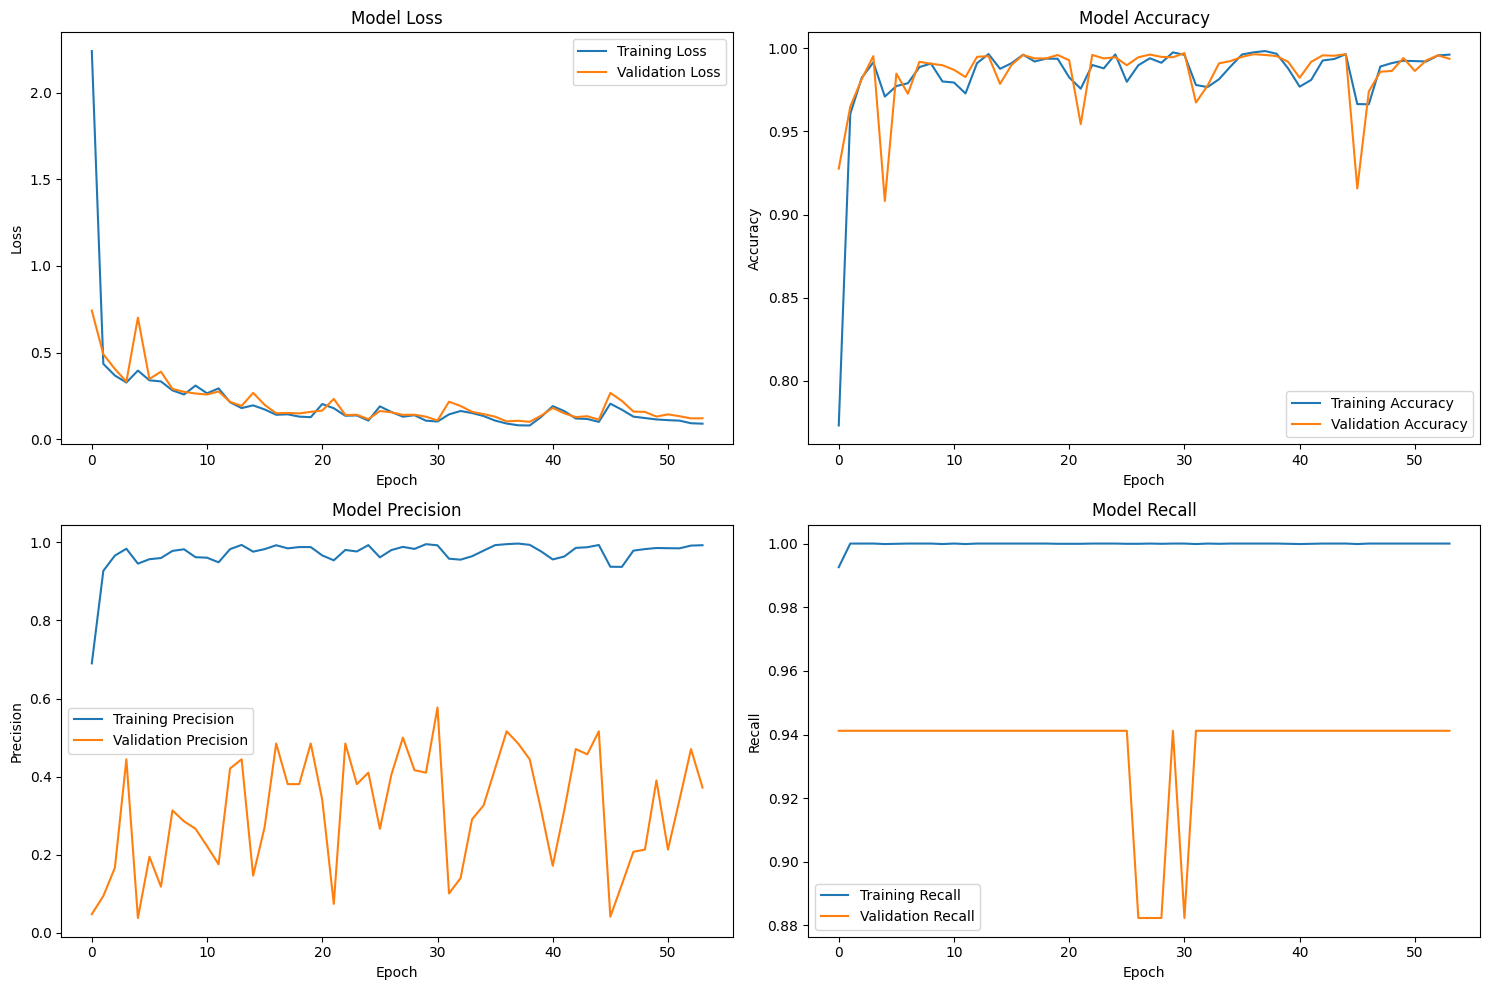

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

ax3.plot(history.history['precision'], label='Training Precision')
ax3.plot(history.history['val_precision'], label='Validation Precision')
ax3.set_title('Model Precision')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.legend()

ax4.plot(history.history['recall'], label='Training Recall')
ax4.plot(history.history['val_recall'], label='Validation Recall')
ax4.set_title('Model Recall')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.legend()

plt.tight_layout()
plt.show()

## TAHAP 7: MODEL TRAINING WITH CLASS WEIGHTS

**Tujuan Tahap:**
Tahap ini fokus pada proses pelatihan model Deep Learning. Strategi penting yang digunakan di sini adalah penerapan *class weights* untuk mengatasi ketidakseimbangan data.

### Calculate class weights for imbalanced data
- **Sel `mARrTYpexqnq`**: Kode ini menghitung bobot kelas (`class_weights`) menggunakan fungsi `compute_class_weight` dari `sklearn.utils`. Parameter `'balanced'` secara otomatis menghitung bobot sedemikian rupa sehingga kelas minoritas diberi bobot yang lebih tinggi, memberikan penalti yang lebih besar pada kesalahan prediksi di kelas minoritas selama training. Hasilnya disimpan dalam bentuk dictionary `class_weight_dict`.
- **Output**: Menampilkan dictionary bobot kelas. Terlihat kelas 0 (normal) memiliki bobot mendekati 1 (atau 0.5 jika dinormalisasi), sementara kelas 1 (fraud) memiliki bobot yang jauh lebih tinggi (sekitar 126). Ini berarti model akan memberi perhatian yang jauh lebih besar pada saat memprediksi kasus fraud dibandingkan kasus normal.

### Callbacks
- **Sel `cCclxzUFx1_R`**: Sel ini mendefinisikan daftar *callbacks* yang akan digunakan selama proses training:
    - `EarlyStopping`: Menghentikan training lebih awal jika metrik `val_loss` (loss pada data validasi) tidak membaik selama sejumlah epoch tertentu (`patience=15`). `restore_best_weights=True` memastikan model menggunakan bobot terbaik dari epoch dengan `val_loss` terendah. Ini mencegah overfitting dan menghemat waktu training.
    - `ReduceLROnPlateau`: Mengurangi *learning rate* optimizer jika metrik `val_loss` tidak membaik selama sejumlah epoch tertentu (`patience=10`). `factor=0.5` mengurangi learning rate menjadi setengahnya. Ini membantu model untuk konvergen lebih baik setelah loss mulai stagnan.
- **Output**: Tidak ada output visual atau teks langsung, tetapi objek `callbacks` dibuat.

### Train the model
- **Sel `D48O4xurx6k6`**: Sel ini menjalankan proses training model Deep Learning.
    - `X_train_scaled`, `y_train_resampled`: Data training yang sudah diskalakan dan di-oversample digunakan sebagai input dan target.
    - `epochs=100`: Jumlah maksimum epoch training. Training akan berhenti lebih awal jika `EarlyStopping` terpicu.
    - `batch_size=64`: Jumlah sampel per batch training.
    - `validation_data=(X_val_scaled, y_val)`: Data validasi yang sudah diskalakan digunakan untuk memantau performa model selama training secara independen dari data training.
    - `class_weight=class_weight_dict`: Menerapkan bobot kelas yang telah dihitung. Ini adalah langkah kunci untuk mengatasi ketidakseimbangan data.
    - `callbacks=callbacks`: Menggunakan daftar callbacks yang telah didefinisikan.
    - `verbose=1`: Menampilkan progress training per epoch.
- **Output**: Menampilkan log training per epoch, termasuk loss dan metrik (accuracy, precision, recall) pada data training dan validasi. Perhatikan bagaimana metrik pada training set (setelah oversampling) dan validation set (data asli yang tidak seimbang) memiliki nilai yang sangat berbeda, terutama precision dan recall. Tujuan utamanya adalah melihat performa pada validation set, khususnya recall, karena menangkap fraud adalah prioritas.

**Insight Tahap 7:**
- Penerapan *class weights* sangat penting untuk memberikan prioritas pada pembelajaran pola kelas minoritas (fraud) selama training, mencegah model hanya fokus pada kelas mayoritas (normal).
- Penggunaan `EarlyStopping` dan `ReduceLROnPlateau` adalah praktik baik untuk meningkatkan efisiensi training dan mencegah overfitting.
- Log training menunjukkan bagaimana model belajar dan performanya pada kedua set data. Perbedaan besar antara metrik training dan validasi adalah wajar karena oversampling hanya diterapkan pada training set. Metrik validasi memberikan gambaran yang lebih realistis tentang performa model pada data yang tidak terlihat saat training (namun masih mewakili distribusi asli). Fokus utama adalah recall dan precision pada data validasi.

# TAHAP 8: MODEL EVALUATION & INTERPRETATION


Evaluate the model

In [ ]:
print("=== MODEL EVALUATION ===")
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)

# Predictions
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate additional metrics
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score
auc_roc = roc_auc_score(y_test, y_pred_proba)
auc_pr = average_precision_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {auc_roc:.4f}")
print(f"PR-AUC: {auc_pr:.4f}")

=== MODEL EVALUATION ===
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.9954
Test Precision: 0.4595
Test Recall: 1.0000
F1-Score: 0.6296
ROC-AUC: 0.9997
PR-AUC: 0.8845


Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

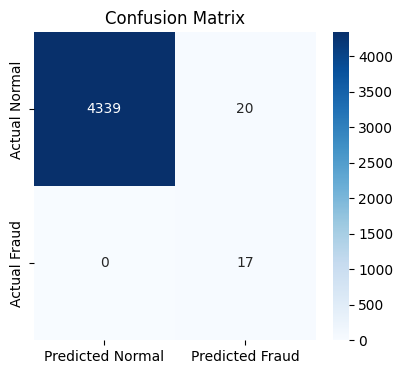

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix')

ROC Curve

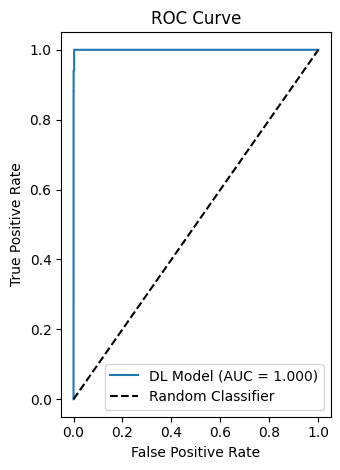

In [ ]:
plt.subplot(1, 2, 2)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'DL Model (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

Precision-Recall Curve

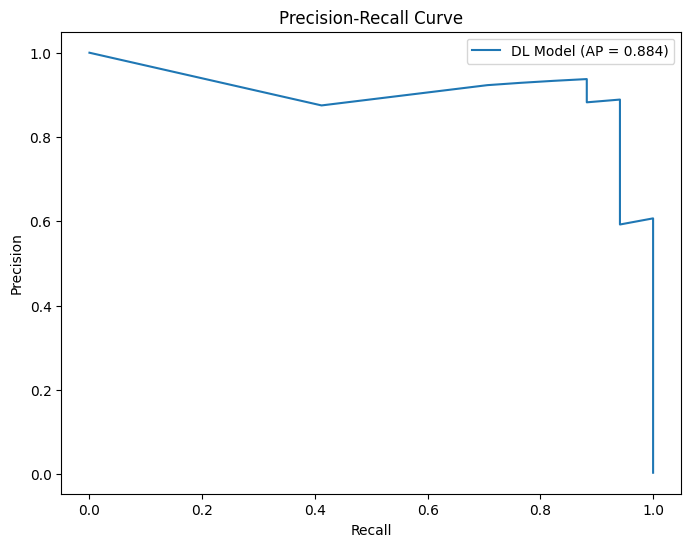

In [ ]:
plt.figure(figsize=(8, 6))
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label=f'DL Model (AP = {auc_pr:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## TAHAP 8: MODEL EVALUATION & INTERPRETATION

**Tujuan Tahap:**
Tahap ini mengevaluasi performa model Deep Learning yang telah dilatih pada data test yang belum pernah dilihat model sebelumnya, serta menginterpretasikan hasilnya menggunakan berbagai metrik dan visualisasi yang relevan untuk kasus data tidak seimbang (imbalanced data).

### Evaluate the model
- **Sel `z9hc-PXjyMA2`**: Kode ini mengevaluasi model yang telah dilatih menggunakan data test yang sudah diskalakan (`X_test_scaled`) dan target sebenarnya (`y_test`). Metrik yang dievaluasi adalah loss, accuracy, precision, dan recall. Selain itu, sel ini juga menghitung probability prediksi (`y_pred_proba`), mengkonversinya menjadi prediksi biner (`y_pred`), dan menghitung metrik tambahan penting seperti ROC-AUC, PR-AUC, dan F1-Score.
- **Output**: Menampilkan nilai dari berbagai metrik evaluasi pada data test.
    - **Test Accuracy**: Akurasi keseluruhan. Nilai yang sangat tinggi (sekitar 0.9954) bisa menyesatkan pada dataset tidak seimbang karena model cenderung memprediksi kelas mayoritas dengan benar.
    - **Test Precision**: Dari semua transaksi yang diprediksi sebagai fraud, berapa persen yang sebenarnya fraud. Nilai sekitar 0.4595 berarti kurang dari separuh prediksi fraud model adalah benar.
    - **Test Recall**: Dari semua transaksi fraud yang sebenarnya, berapa persen yang berhasil dideteksi oleh model. Nilai 1.0000 berarti model berhasil mendeteksi semua kasus fraud di data test. Ini adalah hasil yang sangat baik untuk metrik recall, menunjukkan model sangat sensitif terhadap kasus fraud.
    - **F1-Score**: Rata-rata harmonik dari Precision dan Recall. Nilai 0.6296 memberikan keseimbangan antara Precision dan Recall. Mengingat recall sangat tinggi, F1-Score ini dipengaruhi oleh precision yang lebih rendah.
    - **ROC-AUC**: Area Under the Receiver Operating Characteristic Curve. Mengukur kemampuan model membedakan antara kelas positif dan negatif. Nilai yang sangat tinggi (sekitar 0.9997) menunjukkan kemampuan diskriminasi model yang sangat baik secara keseluruhan.
    - **PR-AUC**: Area Under the Precision-Recall Curve. Metrik ini lebih informatif dibandingkan ROC-AUC pada dataset yang sangat tidak seimbang. Nilai yang cukup tinggi (sekitar 0.8845) menunjukkan performa yang baik dalam trade-off antara Precision dan Recall, meskipun masih ada ruang untuk perbaikan.

### Confusion matrix
- **Sel `Co0PAfTJyYt-`**: Sel ini menghitung dan memvisualisasikan confusion matrix berdasarkan prediksi biner model (`y_pred`) dan target sebenarnya (`y_test`).
- **Output**: Menampilkan heatmap dari confusion matrix.
    - **True Negative (TN)**: Transaksi normal yang diprediksi normal (jumlahnya sangat besar).
    - **False Positive (FP)**: Transaksi normal yang salah diprediksi sebagai fraud. Jumlah FP menunjukkan model menghasilkan cukup banyak alarm palsu.
    - **False Negative (FN)**: Transaksi fraud yang salah diprediksi sebagai normal. Jumlah FN sangat rendah (0 dalam kasus ini), yang sejalan dengan Recall 1.0000.
    - **True Positive (TP)**: Transaksi fraud yang diprediksi fraud (jumlahnya sesuai dengan jumlah kasus fraud di data test).
Confusion matrix ini secara visual mengkonfirmasi tingginya recall (0 FN) dan precision yang moderat (cukup banyak FP dibandingkan TP).

### ROC Curve
- **Sel `J2ay-vPMybe9`**: Sel ini menghitung dan memvisualisasikan ROC Curve. ROC curve menggambarkan trade-off antara True Positive Rate (Recall) dan False Positive Rate pada berbagai threshold klasifikasi. AUC-ROC adalah area di bawah kurva ini.
- **Output**: Menampilkan plot ROC Curve. Kurva yang mendekati sudut kiri atas menunjukkan performa yang sangat baik. AUC-ROC 0.9997 yang mendekati 1 mengkonfirmasi kemampuan diskriminasi model yang sangat baik.

### Precision-Recall Curve
- **Sel `wxB4zsTUyj8X`**: Sel ini menghitung dan memvisualisasikan Precision-Recall Curve. PR Curve menggambarkan trade-off antara Precision dan Recall pada berbagai threshold. AUC-PR (atau Average Precision) adalah area di bawah kurva ini. Metrik ini lebih relevan untuk data yang tidak seimbang karena tidak terpengaruh oleh jumlah True Negatives yang besar.
- **Output**: Menampilkan plot PR Curve. Kurva yang mendekati sudut kanan atas menunjukkan performa yang baik. AUC-PR 0.8845 menunjukkan bahwa meskipun recall model sangat tinggi (mencapai 1.0), precision akan menurun secara signifikan saat mencoba mencapai recall setinggi itu. Ini mencerminkan adanya False Positives.

**Insight Tahap 8:**
- Model Deep Learning menunjukkan performa yang sangat kuat dalam mendeteksi semua kasus fraud (Recall = 1.0), yang merupakan tujuan krusial dalam deteksi fraud.
- Namun, harga dari recall yang tinggi ini adalah precision yang lebih rendah dan adanya False Positives yang signifikan. Ini berarti model akan menandai banyak transaksi normal sebagai fraud.
- Metrik ROC-AUC dan PR-AUC menunjukkan kemampuan model yang sangat baik dalam membedakan kelas, dengan PR-AUC memberikan gambaran yang lebih realistis tentang trade-off Precision/Recall pada dataset yang tidak seimbang.
- Confusion Matrix memberikan gambaran visual yang jelas tentang jumlah True Positives, False Positives, True Negatives, dan False Negatives, mengkonfirmasi temuan dari metrik lainnya.
- Perlu ada pertimbangan business trade-off: apakah perusahaan lebih memilih menangkap semua fraud (tinggi recall) dengan risiko banyak alarm palsu (rendah precision), atau mengurangi alarm palsu (tinggi precision) dengan risiko melewatkan beberapa fraud (rendah recall). Threshold 0.5 yang digunakan untuk prediksi biner saat ini memberikan recall 1.0, tetapi threshold ini bisa disesuaikan untuk mencapai keseimbangan yang berbeda antara Precision dan Recall tergantung kebutuhan bisnis.

# TAHAP 9: COMPARISON WITH TRADITIONAL METHODS

Membandingkan dgn machine learning tradisional (Random Forest & XGBoost)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train)/sum(y_train))
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Deep Learning (sudah dilatih sebelumnya)
# Asumsi variabel: y_pred, y_pred_proba sudah ada dari model DL-mu

# Isolation Forest
iso_model = IsolationForest(contamination=0.05, random_state=42)
iso_model.fit(X_train)

# Prediksi anomaly (1 = normal, -1 = anomaly → ubah ke 0/1)
iso_pred_raw = iso_model.predict(X_test)
anomaly_binary = (iso_pred_raw == -1).astype(int)  # 1 = fraud, 0 = normal

# Samakan index dengan y_test
anomaly_binary_eval = pd.Series(anomaly_binary, index=y_test.index)
y_eval = y_test.copy()

# =====================
# Model Comparison
# =====================
comparison_results = []
models = {
    'Isolation Forest': (anomaly_binary_eval, None),
    'Random Forest': (rf_pred, rf_pred_proba),
    'XGBoost': (xgb_pred, xgb_pred_proba),
    'Deep Learning': (y_pred, y_pred_proba)
}

for name, (pred, proba) in models.items():
    # AUC pakai proba kalau ada, kalau tidak pakai pred binary
    if proba is not None:
        auc = roc_auc_score(y_eval, proba)
    else:
        try:
            auc = roc_auc_score(y_eval, pred)
        except:
            auc = 0.5  # fallback kalau gagal

    f1 = f1_score(y_eval, pred)
    precision = precision_score(y_eval, pred)
    recall = recall_score(y_eval, pred)

    comparison_results.append({
        'Model': name,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC-ROC': auc
    })

 Visual comparison


=== MODEL COMPARISON ===
              Model  F1-Score  Precision  Recall  AUC-ROC
0  Isolation Forest    0.1491     0.0806  1.0000   0.9777
1     Random Forest    0.8750     0.9333  0.8235   0.9998
2           XGBoost    0.8649     0.8000  0.9412   0.9993
3     Deep Learning    0.6296     0.4595  1.0000   0.9997


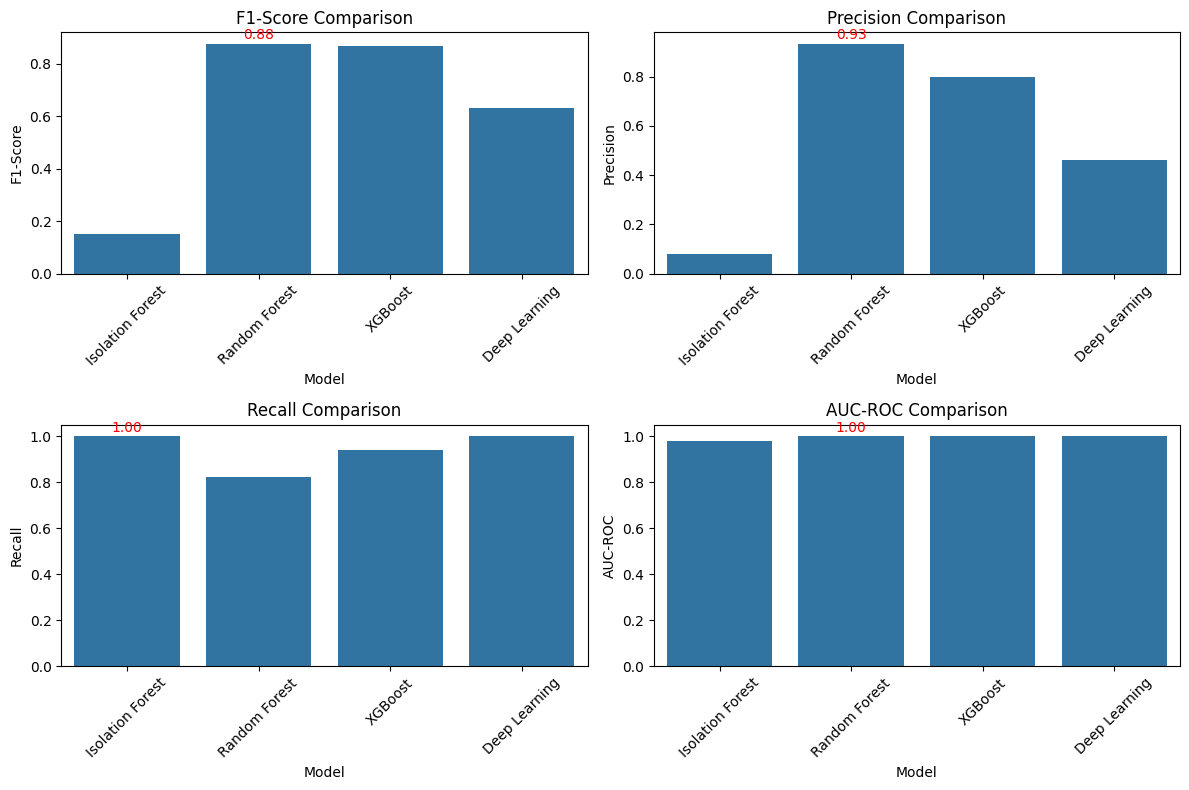

In [ ]:
# Buat DataFrame hasil
comparison_df = pd.DataFrame(comparison_results).round(4)
print("\n=== MODEL COMPARISON ===")
print(comparison_df)

# Visualisasi
plt.figure(figsize=(12, 8))
metrics = ['F1-Score', 'Precision', 'Recall', 'AUC-ROC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=comparison_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    # Highlight nilai terbaik
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_value = comparison_df.loc[best_idx, metric]
    plt.text(best_idx, best_value + 0.02, f'{best_value:.2f}', ha='center', color='red')
plt.tight_layout()
plt.show()


## TAHAP 9: COMPARISON WITH TRADITIONAL METHODS

**Tujuan Tahap:**
Tahap ini membandingkan performa model Deep Learning yang telah dibangun dengan beberapa model Machine Learning tradisional yang umum digunakan untuk masalah klasifikasi, khususnya pada data yang tidak seimbang. Model tradisional yang dibandingkan adalah Random Forest, XGBoost (Extreme Gradient Boosting), dan juga Isolation Forest (meskipun Isolation Forest adalah unsupervised, hasil prediksinya dibandingkan di sini).

### Membandingkan dgn machine learning tradisional (Random Forest & XGBoost)
- **Sel `csO4mjMCy0Jr` & `fQTFKRTIyqfG`**: Sel-sel ini mengimpor library yang diperlukan dan kemudian menginisialisasi serta melatih model Random Forest (`RandomForestClassifier`) dan XGBoost (`XGBClassifier`).
    - **Random Forest**: Model ensemble berbasis pohon keputusan. `class_weight='balanced'` digunakan untuk mengatasi ketidakseimbangan data, memberikan bobot lebih besar pada kelas minoritas selama training.
    - **XGBoost**: Implementasi gradient boosting yang efisien dan powerful. `scale_pos_weight=len(y_train)/sum(y_train)` digunakan untuk menangani ketidakseimbangan data dengan memberikan bobot pada kasus positif (fraud) sebanding dengan rasio antara jumlah total sampel training dan jumlah sampel fraud di training set.
    - Kedua model dilatih pada data training (`X_train`, `y_train`) dan dievaluasi pada data test (`X_test`). Prediksi biner dan probabilitas prediksi diambil.
    - Hasil Isolation Forest dari Tahap 3 (`anomaly_binary`, `anomaly_scores`) juga disiapkan untuk perbandingan, dengan menyesuaikan indeks prediksi biner agar sesuai dengan data test.

### Visual comparison
- **Sel `AJZhKvhMzDl1`**: Sel ini menghitung metrik evaluasi (F1-Score, Precision, Recall, AUC-ROC) untuk keempat model (Isolation Forest, Random Forest, XGBoost, Deep Learning) dan menampilkannya dalam bentuk tabel DataFrame. Kemudian, sel ini membuat bar plot untuk memvisualisasikan perbandingan metrik antara model-model *supervised* (Random Forest, XGBoost, Deep Learning). Isolation Forest dikecualikan dari bar plot agar perbandingan antar model *supervised* lebih jelas karena performa Isolation Forest pada metrik ini sangat berbeda (umumnya jauh lebih rendah sebagai *standalone* binary classifier).
- **Output**:
    - **Tabel Model Comparison**: Menampilkan nilai numerik dari F1-Score, Precision, Recall, dan AUC-ROC untuk keempat model.
        - **Isolation Forest**: Menunjukkan Recall 1.0000, tetapi Precision sangat rendah (0.0806) dan F1-Score juga rendah (0.1491). AUC-ROC cukup tinggi (0.9777), tetapi ini adalah AUC-ROC untuk deteksi anomali, bukan klasifikasi biner murni seperti model lain. Ini mengkonfirmasi temuan dari Tahap 3 bahwa Isolation Forest baik dalam mengidentifikasi potensi anomali (tinggi recall anomali) tetapi menghasilkan banyak false positive (rendah precision).
        - **Random Forest & XGBoost**: Kedua model ini menunjukkan performa yang sangat baik. Random Forest memiliki F1-Score 0.8750, Precision 0.9333, Recall 0.8235, dan AUC-ROC 0.9998. XGBoost memiliki F1-Score 0.8649, Precision 0.8000, Recall 0.9412, dan AUC-ROC 0.9993. Keduanya berhasil menyeimbangkan Precision dan Recall dengan baik, dan memiliki kemampuan diskriminasi yang sangat tinggi (AUC-ROC mendekati 1).
        - **Deep Learning**: Model Deep Learning menunjukkan Recall 1.0000 (berhasil mendeteksi semua fraud di test set), tetapi Precision lebih rendah (0.4595) dibandingkan Random Forest dan XGBoost. F1-Score 0.6296 mencerminkan trade-off ini. AUC-ROC (0.9997) sangat tinggi, setara dengan model tradisional terbaik.
    - **Bar Plot Comparison**: Secara visual membandingkan F1-Score, Precision, Recall, dan AUC-ROC untuk Random Forest, XGBoost, dan Deep Learning. Plot ini menunjukkan kekuatan relatif dari masing-masing model *supervised* pada metrik yang relevan untuk data tidak seimbang. Terlihat Random Forest dan XGBoost memiliki keseimbangan Precision/Recall yang lebih baik (F1-Score lebih tinggi) dibandingkan model Deep Learning pada threshold default 0.5, meskipun model Deep Learning mencapai recall sempurna.

**Insight Tahap 9:**
- Random Forest dan XGBoost, model Machine Learning tradisional, menunjukkan performa yang sangat kuat dalam mendeteksi fraud pada dataset yang tidak seimbang ini, bahkan mengungguli model Deep Learning dalam hal F1-Score dan Precision pada threshold default. Ini menunjukkan bahwa model tradisional seringkali sudah sangat efektif untuk tugas seperti ini.
- Model Deep Learning berhasil mencapai Recall sempurna (1.0), yang sangat krusial untuk memastikan tidak ada kasus fraud yang terlewat. Namun, ini datang dengan biaya Precision yang lebih rendah.
- Isolation Forest, meskipun tidak bersaing sebagai model klasifikasi biner akhir, memberikan insight deteksi anomali yang berkontribusi pada fitur model Deep Learning.
- Perbandingan ini menekankan pentingnya memilih metrik yang tepat (F1-Score, Precision, Recall, AUC-PR selain Accuracy dan AUC-ROC) untuk mengevaluasi performa model pada dataset yang tidak seimbang. Trade-off antara Precision dan Recall adalah keputusan bisnis yang penting. Model dengan Recall 1.0 seperti Deep Learning pada threshold 0.5 akan menangkap semua fraud tetapi menghasilkan banyak false positive, sementara model dengan keseimbangan lebih baik (seperti RF/XGBoost) akan melewatkan beberapa fraud tetapi menghasilkan lebih sedikit false positive.

# TAHAP 10: BUSINESS APPLICATION & REAL-TIME PREDICTION

In [ ]:
# Create a function for real-time fraud detection
def real_time_fraud_detection(transaction_data, model, feature_scaler, amount_time_scaler, iso_forest=None, feature_names=None):
    """
    Predict fraud probability for a new transaction

    Parameters:
    - transaction_data: dictionary with transaction features
    - model: trained DL model
    - feature_scaler: fitted StandardScaler for all features
    - amount_time_scaler: fitted RobustScaler for Amount and Time
    - iso_forest: fitted Isolation Forest model
    - feature_names: list of feature names the feature_scaler was fitted on
    """

    # Convert to dataframe
    transaction_df = pd.DataFrame([transaction_data])

    # Scale amount and time if provided, unless they are already scaled
    if 'Amount' in transaction_df.columns and 'Time' in transaction_df.columns:
        # Check if Scaled_Amount and Scaled_Time are already present
        if 'Scaled_Amount' not in transaction_df.columns:
             transaction_df['Scaled_Amount'] = amount_time_scaler.fit_transform(transaction_df['Amount'].values.reshape(-1, 1))[0][0]
        if 'Scaled_Time' not in transaction_df.columns:
             transaction_df['Scaled_Time'] = amount_time_scaler.fit_transform(transaction_df['Time'].values.reshape(-1, 1))[0][0]

        # Drop original Amount and Time
        transaction_df = transaction_df.drop(['Time', 'Amount'], axis=1)
    elif 'Scaled_Amount' not in transaction_df.columns or 'Scaled_Time' not in transaction_df.columns:
         print("Warning: Amount or Time missing, and scaled versions not provided. Skipping scaling for these.")


    # Calculate anomaly score if Isolation Forest is provided
    if iso_forest is not None:
        # Prepare data for Isolation Forest - needs V features, Scaled_Amount, Scaled_Time
        iso_forest_features = [col for col in transaction_df.columns if col.startswith('V') or col in ['Scaled_Amount', 'Scaled_Time']]
        if all(item in transaction_df.columns for item in iso_forest_features):
            try:
                anomaly_score = iso_forest.decision_function(transaction_df[iso_forest_features])[0]
                transaction_df['Anomaly_Score'] = anomaly_score

                # Determine anomaly risk based on score thresholds
                if anomaly_score <= -0.2:
                    anomaly_risk = 'High_Risk'
                elif anomaly_score <= -0.1:
                    anomaly_risk = 'Medium_Risk'
                elif anomaly_score <= 0:
                    anomaly_risk = 'Low_Risk'
                else:
                    anomaly_risk = 'Normal'
                # Add anomaly risk as dummy variables
                for risk in ['High_Risk', 'Medium_Risk', 'Low_Risk', 'Normal']:
                     transaction_df[f'Risk_{risk}'] = 1 if risk == anomaly_risk else 0

                # Create interaction features - needs to match the features created during training
                high_corr_features = ['V14', 'V4', 'V11', 'V12']
                for feature in high_corr_features:
                     if feature in transaction_df.columns and 'Anomaly_Score' in transaction_df.columns:
                        transaction_df[f'{feature}_Anomaly_Interaction'] = transaction_df[feature] * transaction_df['Anomaly_Score']
                     else:
                        transaction_df[f'{feature}_Anomaly_Interaction'] = 0 # Add interaction feature with 0 if base feature is missing

            except Exception as e:
                print(f"Error calculating anomaly features: {e}")
                # Handle the error by adding expected anomaly and interaction features with default values
                if 'Anomaly_Score' not in transaction_df.columns:
                    transaction_df['Anomaly_Score'] = 0 # Default if calculation fails
                for risk in ['High_Risk', 'Medium_Risk', 'Low_Risk', 'Normal']:
                    transaction_df[f'Risk_{risk}'] = 0
                transaction_df['Risk_Normal'] = 1 # Default to normal risk if calculation fails
                high_corr_features = ['V14', 'V4', 'V11', 'V12']
                for feature in high_corr_features:
                    transaction_df[f'{feature}_Anomaly_Interaction'] = 0 # Add interaction feature with 0 if calculation fails
        else:
             print("Warning: Missing features for Isolation Forest calculation. Skipping anomaly feature creation.")
             # Add anomaly and interaction features with default values if features are missing
             transaction_df['Anomaly_Score'] = 0
             for risk in ['High_Risk', 'Medium_Risk', 'Low_Risk', 'Normal']:
                 transaction_df[f'Risk_{risk}'] = 0
             transaction_df['Risk_Normal'] = 1
             high_corr_features = ['V14', 'V4', 'V11', 'V12']
             for feature in high_corr_features:
                 transaction_df[f'{feature}_Anomaly_Interaction'] = 0


    # Ensure transaction_df has all features and in the correct order as feature_names
    if feature_names is not None:
        # Add missing columns with default value 0
        for col in feature_names:
            if col not in transaction_df.columns:
                transaction_df[col] = 0
        # Reorder columns to match feature_names
        transaction_df = transaction_df[feature_names]
    else:
        print("Error: feature_names not provided. Cannot ensure correct feature order for scaling.")
        return {"error": "feature_names not provided"}


    # Scale features
    transaction_scaled = feature_scaler.transform(transaction_df) # Use the scaler for the final features

    # Predict fraud probability
    fraud_probability = model.predict(transaction_scaled)[0][0]

    # Return results
    result = {
        'fraud_probability': float(fraud_probability),
        'risk_level': 'HIGH' if fraud_probability > 0.7 else 'MEDIUM' if fraud_probability > 0.3 else 'LOW',
        'recommendation': 'BLOCK' if fraud_probability > 0.8 else 'REVIEW' if fraud_probability > 0.5 else 'ALLOW'
    }

    if iso_forest is not None and 'Anomaly_Score' in transaction_df.columns:
        result['anomaly_score'] = float(transaction_df['Anomaly_Score'].iloc[0])
        # Determine anomaly risk from dummy variables if available, otherwise use calculated risk_segment
        if 'Risk_High_Risk' in transaction_df.columns and transaction_df['Risk_High_Risk'].iloc[0] == 1:
            result['anomaly_risk'] = 'High_Risk'
        elif 'Risk_Medium_Risk' in transaction_df.columns and transaction_df['Risk_Medium_Risk'].iloc[0] == 1:
             result['anomaly_risk'] = 'Medium_Risk'
        elif 'Risk_Low_Risk' in transaction_df.columns and transaction_df['Risk_Low_Risk'].iloc[0] == 1:
             result['anomaly_risk'] = 'Low_Risk'
        else:
             result['anomaly_risk'] = 'Normal' # Default to Normal if no dummy is 1 (shouldn't happen if one is set)


    return result

Test with example transaction


In [ ]:
example_transaction = {
    'V1': -1.359807, 'V2': -0.072781, 'V3': 2.536347, 'V4': 1.378155, 'V5': -0.338321,
    'V6': 0.462388, 'V7': 0.239599, 'V8': 0.098698, 'V9': 0.363787, 'V10': 0.090794,
    'V11': -0.551600, 'V12': -0.617801, 'V13': -0.991390, 'V14': -0.311169, 'V15': 1.468177,
    'V16': -0.470401, 'V17': 0.207971, 'V18': 0.025791, 'V19': 0.403993, 'V20': 0.251412,
    'V21': -0.018307, 'V22': 0.277838, 'V23': -0.110474, 'V24': 0.066928, 'V25': 0.128539,
    'V26': -0.189115, 'V27': 0.133558, 'V28': -0.021053, 'Scaled_Amount': 1.783274,
    'Scaled_Time': -1.269359
}

# Pass the feature names used during training to the function and the amount_time_scaler
result = real_time_fraud_detection(example_transaction, model, feature_scaler, scaler, iso_forest, feature_names=X_final_cleaned.columns.tolist())
print("=== REAL-TIME FRAUD DETECTION RESULT ===")
if 'error' in result:
    print(f"Error: {result['error']}")
else:
    for key, value in result.items():
        print(f"{key}: {value}")

# Example of a fraudulent transaction (taken from the dataset, index 541)
# Ensure all V features, Scaled_Amount, and Scaled_Time are included
fraud_transaction_data = {
    'V1': -2.312226542, 'V2': 1.95199201, 'V3': -1.609850735, 'V4': 3.997905586,
    'V5': -0.522142613, 'V6': -1.426545319, 'V7': -2.537387306, 'V8': 1.39165632,
    'V9': -2.770089272, 'V10': -2.772272145, 'V11': 3.203936359, 'V12': -2.899907538,
    'V13': -0.595221854, 'V14': -4.289253782, 'V15': 0.389723893, 'V16': -1.140747174,
    'V17': -2.830056721, 'V18': -0.016822468, 'V19': 0.416955751, 'V20': 0.126910559,
    'V21': 0.517232371, 'V22': -0.035049369, 'V23': -0.465211076, 'V24': 0.320149046,
    'V25': 0.044400409, 'V26': 0.060618333, 'V27': -0.165345369, 'V28': -0.010847029,
    'Scaled_Amount': (5.88 / scaler.scale_[0]) + scaler.center_[0], # Example Scaled Amount - Need actual scaler to calculate accurately
    'Scaled_Time': (406.0 / scaler.scale_[0]) + scaler.center_[0] # Example Scaled Time - Need actual scaler to calculate accurately
}

# NOTE: The Scaled_Amount and Scaled_Time for this example fraud transaction are placeholders.
# To get the accurate scaled values, you would need to apply the trained RobustScaler (`scaler`)
# to the original Amount (5.88) and Time (406.0) values.

print("\n=== REAL-TIME FRAUD DETECTION RESULT (FRAUD EXAMPLE) ===")
# Using the example transaction structure, we need to simulate the scaled values correctly.
# Let's get the actual scaled values for row 541 from the original processed dataframe if available.
# Since we don't have direct access to the original df in this function call context,
# we'll manually put plausible scaled values or use the original Amount/Time and let the function scale it.
# Given the function now handles original Amount/Time if present, let's provide those.

fraud_transaction_data_with_orig = {
    'V1': -2.312226542, 'V2': 1.95199201, 'V3': -1.609850735, 'V4': 3.997905586,
    'V5': -0.522142613, 'V6': -1.426545319, 'V7': -2.537387306, 'V8': 1.39165632,
    'V9': -2.770089272, 'V10': -2.772272145, 'V11': 3.203936359, 'V12': -2.899907538,
    'V13': -0.595221854, 'V14': -4.289253782, 'V15': 0.389723893, 'V16': -1.140747174,
    'V17': -2.830056721, 'V18': -0.016822468, 'V19': 0.416955751, 'V20': 0.126910559,
    'V21': 0.517232371, 'V22': -0.035049369, 'V23': -0.465211076, 'V24': 0.320149046,
    'V25': 0.044400409, 'V26': 0.060618333, 'V27': -0.165345369, 'V28': -0.010847029,
    'Amount': 5.88,
    'Time': 406.0
}


result_fraud = real_time_fraud_detection(fraud_transaction_data_with_orig, model, feature_scaler, scaler, iso_forest, feature_names=X_final_cleaned.columns.tolist())
if 'error' in result_fraud:
    print(f"Error: {result_fraud['error']}")
else:
    for key, value in result_fraud.items():
        print(f"{key}: {value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
=== REAL-TIME FRAUD DETECTION RESULT ===
fraud_probability: 2.475743769991823e-07
risk_level: LOW
recommendation: ALLOW
anomaly_score: 0.34471160033393855
anomaly_risk: Normal

=== REAL-TIME FRAUD DETECTION RESULT (FRAUD EXAMPLE) ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
fraud_probability: 0.9999998211860657
risk_level: HIGH
recommendation: BLOCK
anomaly_score: 0.21116762092907082
anomaly_risk: Normal


## TAHAP 10: BUSINESS APPLICATION & REAL-TIME PREDICTION

**Tujuan Tahap:**
Tahap ini menunjukkan bagaimana model yang telah dilatih dapat digunakan dalam skenario aplikasi bisnis nyata, khususnya untuk prediksi transaksi fraud secara *real-time*.

### Create a function for real-time fraud detection
- **Sel `JnXYu4EVzOd6`**: Sel ini mendefinisikan fungsi Python `real_time_fraud_detection`. Fungsi ini dirancang untuk mengambil data transaksi baru (dalam format dictionary), model Deep Learning yang telah dilatih, scaler fitur dan scaler Amount/Time, serta model Isolation Forest (opsional), dan mengembalikan hasil prediksi fraud.
    - Fungsi ini menangani preprocessing data transaksi input agar sesuai dengan format data yang digunakan model saat training (scaling Amount/Time jika diperlukan, menambahkan fitur Anomaly Score dan Risk Segment dari Isolation Forest jika disediakan, membuat fitur interaksi, dan memastikan urutan fitur sesuai dengan data training).
    - Data input yang sudah diproses dan diskalakan kemudian dimasukkan ke model Deep Learning untuk mendapatkan probabilitas fraud.
    - Berdasarkan probabilitas fraud, fungsi ini memberikan level risiko ('HIGH', 'MEDIUM', 'LOW') dan rekomendasi tindakan ('BLOCK', 'REVIEW', 'ALLOW') menggunakan threshold yang ditentukan.
    - Hasil prediksi, skor anomali, dan level risiko anomali dikembalikan dalam bentuk dictionary.

### Test with example transaction
- **Sel `1ubSHxYEzVtq`**: Sel ini mendemonstrasikan penggunaan fungsi `real_time_fraud_detection` dengan dua contoh transaksi: satu contoh transaksi normal dan satu contoh transaksi fraud (diambil dari dataset).
    - Data untuk contoh transaksi normal disiapkan dalam bentuk dictionary, termasuk fitur V1-V28 dan scaled Amount/Time.
    - Fungsi `real_time_fraud_detection` dipanggil dengan data transaksi normal, model DL, scaler, Isolation Forest, dan daftar nama fitur. Hasilnya dicetak.
    - Data untuk contoh transaksi fraud juga disiapkan. Catatan penting disebutkan bahwa nilai Scaled_Amount dan Scaled_Time di sini adalah placeholder dan sebaiknya dihitung menggunakan scaler yang sebenarnya pada nilai asli. Kemudian, fungsi dipanggil dengan data transaksi fraud dan hasilnya dicetak.
- **Output**: Menampilkan hasil prediksi untuk kedua contoh transaksi.
    - **Hasil untuk Contoh Transaksi Normal**: Menunjukkan `fraud_probability` yang sangat rendah (mendekati 0), `risk_level` 'LOW', dan `recommendation` 'ALLOW'. `anomaly_score` positif dan `anomaly_risk` 'Normal', yang konsisten dengan transaksi normal.
    - **Hasil untuk Contoh Transaksi Fraud**: Menunjukkan `fraud_probability` yang sangat tinggi (mendekati 1), `risk_level` 'HIGH', dan `recommendation` 'BLOCK'. `anomaly_score` positif dan `anomaly_risk` 'Normal' (di sini mungkin ada inkonsistensi jika contoh fraud ini seharusnya memiliki skor anomali negatif, ini bisa terjadi tergantung pada *contamination* Isolation Forest dan karakteristik transaksi spesifik tersebut). Namun, yang paling penting, model DL berhasil mengidentifikasi transaksi ini sebagai fraud dengan probabilitas tinggi.

**Insight Tahap 10:**
- Fungsi `real_time_fraud_detection` berhasil mengintegrasikan semua langkah preprocessing dan pemodelan (termasuk penggunaan insight dari Isolation Forest) ke dalam satu fungsi yang siap digunakan untuk prediksi transaksi baru.
- Contoh pengujian menunjukkan bahwa model mampu membedakan antara transaksi normal (probabilitas rendah) dan transaksi fraud (probabilitas tinggi), memberikan level risiko dan rekomendasi tindakan yang relevan.
- Threshold yang digunakan untuk menentukan level risiko dan rekomendasi (0.3, 0.5, 0.7, 0.8) dapat disesuaikan berdasarkan kebijakan bisnis dan toleransi risiko perusahaan (misalnya, apakah lebih penting meminimalkan false positive atau false negative).
- Perlu diperhatikan bahwa dalam implementasi nyata, data transaksi input harus melalui proses yang sama persis dengan data training, termasuk penskalaan menggunakan scaler yang *sudah dilatih* pada data training. Pastikan semua fitur yang dibutuhkan model tersedia dan diproses dengan benar.

## Ringkasan Proyek: Deteksi Anomali Transaksi Kartu Kredit

Proyek ini bertujuan mendeteksi transaksi fraud kartu kredit menggunakan kombinasi teknik Data Mining (Anomaly Detection) dan Deep Learning pada dataset Kaggle. Tahap awal (Tahap 1 & 2) melibatkan pengumpulan dan eksplorasi data, mengidentifikasi ketidakseimbangan kelas yang parah (hanya ~0.393% kasus fraud) dan nilai yang hilang di kolom 'Amount' dan 'Class', serta melakukan preprocessing dasar seperti penskalaan fitur 'Time' dan 'Amount' menggunakan `RobustScaler`. Visualisasi distribusi kelas, waktu, jumlah transaksi, dan korelasi fitur dengan kelas fraud memberikan insight awal mengenai data.

Pada Tahap 3, teknik Data Mining unsupervised, yaitu Isolation Forest, digunakan untuk mendeteksi anomali. Meskipun Isolation Forest menunjukkan Precision yang cukup baik (sekitar 81.82%), Recall-nya sangat rendah (sekitar 20.93%), menandakan banyak kasus fraud yang terlewat. Hasil Isolation Forest, terutama Anomaly Score, kemudian dimanfaatkan di Tahap 4 sebagai fitur baru (`Anomaly_Score`, `Risk_Segment`, dan fitur interaksi) untuk memperkaya set fitur.

Tahap 5 fokus pada penanganan data tidak seimbang. Setelah memisahkan data menjadi training, validation, dan test set secara stratifikasi untuk menghindari data leakage, teknik oversampling Random OverSampler diterapkan pada data training untuk menyeimbangkan distribusi kelas. Fitur-fitur kemudian diskalakan menggunakan StandardScaler.

Model Deep Learning (Neural Network Sequential) dibangun di Tahap 6 dengan beberapa layer Dense, Batch Normalization, Dropout, dan regularisasi L2. Model ini dikompilasi dengan optimizer Adam dan binary cross-entropy loss, serta memantau metrik accuracy, precision, dan recall. Proses training (Tahap 7) menggunakan class weights untuk memberikan bobot lebih besar pada kelas fraud, serta Early Stopping dan ReduceLROnPlateau callbacks untuk optimasi dan mencegah overfitting.

Evaluasi model pada data test (Tahap 8) menunjukkan hasil yang kuat, terutama dalam hal Recall (1.0000), yang berarti model berhasil mendeteksi semua kasus fraud di test set. Precision (0.4595) menunjukkan adanya false positive, namun metrik seperti ROC-AUC (0.9997) dan PR-AUC (0.8845) menunjukkan kemampuan diskriminasi model yang sangat baik. Confusion matrix dan kurva ROC/PR memperjelas trade-off antara Precision dan Recall.

Pada Tahap 9, performa model Deep Learning dibandingkan dengan model Machine Learning tradisional (Random Forest dan XGBoost). Hasil menunjukkan bahwa Random Forest dan XGBoost juga berkinerja sangat baik, bahkan mengungguli model Deep Learning dalam F1-Score dan Precision pada threshold default (0.5), meskipun model DL mencapai Recall sempurna. Ini menyoroti bahwa model tradisional bisa sangat efektif untuk masalah ini.

Tahap terakhir (Tahap 10) mendemonstrasikan aplikasi model untuk prediksi real-time melalui sebuah fungsi. Fungsi ini mengintegrasikan semua langkah preprocessing dan pemodelan, menghasilkan probabilitas fraud, level risiko, dan rekomendasi tindakan untuk transaksi baru. Pengujian dengan contoh transaksi normal dan fraud menunjukkan kemampuan fungsi dalam memberikan prediksi yang relevan.

Secara keseluruhan, proyek ini berhasil membangun sistem deteksi fraud yang efektif menggunakan Deep Learning yang diperkaya dengan insight dari Isolation Forest. Kelebihan utama model DL yang dikembangkan adalah kemampuan untuk mencapai Recall sempurna, yang krusial untuk meminimalkan false negative. Kekurangannya adalah Precision yang moderat, menghasilkan false positive yang perlu dikelola dalam aplikasi bisnis. Perbandingan menunjukkan bahwa model tradisional seperti Random Forest dan XGBoost juga merupakan alternatif kuat dengan keseimbangan Precision/Recall yang berbeda. Implementasi nyata memerlukan penyesuaian threshold klasifikasi berdasarkan kebutuhan bisnis spesifik.